### 공부시간과 과외횟수에 따른 점수 예측
- goal: predictiom my score
- feature: 공부시간, 과외횟수
- label: jumsu
- datasets: randomly value
- find weight(ω, 가중치), bais
- learning method: supervised learning, regress
- learning algorithm: multi linear regress
    - notice: datasets have to follow linear

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# randomly preparation datasets

hour = [1, 2, 3, 5, 7, 9, 10]
jumsu = [32, 55, 83, 70, 99, 92, 100]
lesson = [0, 0, 2, 1, 2 ,0, 1]

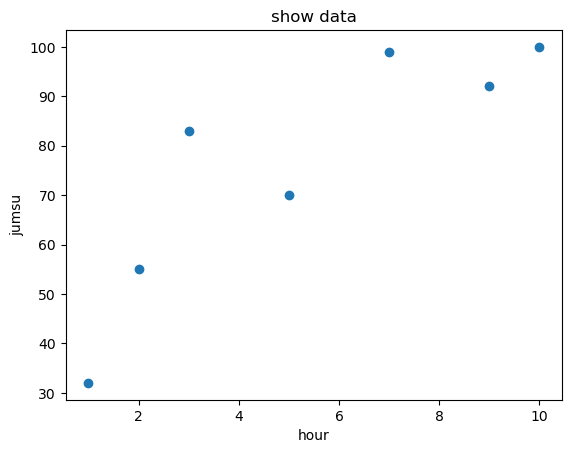

In [5]:
# show datasets
plt.scatter(hour, jumsu)

plt.title('show data')
plt.xlabel('hour')
plt.ylabel('jumsu')

plt.show()

In [7]:
# feature & label
data_df = pd.DataFrame({'Hour':hour, 'Lesson':lesson})
jumsu_sr = pd.Series(jumsu)

In [8]:
# multilinearregress
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

model.fit(data_df, jumsu_sr)

LinearRegression()

In [11]:
# after learning
weight = model.coef_
bais = model.intercept_

print(f"model.coef_: {len(weight)}개, {weight}")
print(f"model.intercept_: {bais}")

model.coef_: 2개, [ 5.64477489 12.41676993]
model.intercept_: 35.37752994630317


In [21]:
# 회귀식: pred_Y = data_df[0]*weight[0] + data_df[1]*weight[1] + bais

In [13]:
# 모델 성능 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
# 점수 => 내부에서 predict() 진행 ==> 결과로 R2 계수를 추출해서 반환
score = model.score(data_df, jumsu_sr)
print(f"score: {score}")

score: 0.9283989000085822


In [16]:
# 성능지표
pred_jumsu = model.predict(data_df)

# loss function
mae = mean_absolute_error(jumsu_sr, pred_jumsu)
mse = mean_squared_error(jumsu_sr, pred_jumsu)
rmse = mean_squared_error(jumsu_sr, pred_jumsu, squared=False)
# 얼마나 정답에 가깝게 예측했는가? -> 1에 가까울수록 좋음
r2 = r2_score(jumsu_sr, pred_jumsu)

In [17]:
print(f"mae: {mae}")
print(f"mse: {mse}")
print(f"rmse: {rmse}")
print(f"r2 score: {r2}")

mae: 5.716291969080074
mse: 39.10296807694575
rmse: 6.253236608105098
r2 score: 0.9283989000085822


In [19]:
# visualization 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
# data
x = data_df['Hour'].to_list()
y = data_df['Lesson'].to_list()
z = jumsu_sr.to_list()

# coordinate